<a href="https://colab.research.google.com/github/y4c6/master_thesis/blob/main/EJMR_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

受夠自己亂七八糟的檔案，放過來整理。

# 這些變數名稱需要心情不錯的時候整理一次

# 套件

In [1]:
from google.colab import drive
# directory
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import json

# 準備 dataset

# 合併json檔案

## 合併檔案 ( 從 EJMRpostXX.json 到 EJMRpost_XX_XX.json )

不是每次都要跑這個

In [ ]:
import glob
import json

def list_json_files(path, start_with): 
    # get a list of json files that starts with specific word 
    json_files = glob.glob(path + f'/{start_with}*.json')
    return json_files

def concat_json_files(file_paths):
    # concatenate the content of all the files in the list
    data = {'topic':[], 'posts':[]}
    for file_path in file_paths:
        with open(file_path, 'r') as f:
            file_data = json.load(f)
            data['topic'].extend(file_data['topic'])
            data['posts'].extend(file_data['posts'])
    return data

def concat_json_files_with_start(path, start_with):
    json_files = list_json_files(path, start_with)
    data = concat_json_files(json_files)
    return data

In [ ]:
path = '/content/gdrive/MyDrive/論文相關材料/'
start_with = 'EJMRpost_'

data = concat_json_files_with_start(path, start_with)

In [ ]:
## 確認合併成功
len(data['topic'])

293840

下面跟上面的好像可以做到一樣的事情

## 合併檔案 ( 從 EJMRpost_XX_XX.json 到 data: dict )

In [7]:
with open('/content/gdrive/MyDrive/論文相關材料/EJMRpost_1_10.json', 'r') as f:
    file1 = json.load(f)

with open('/content/gdrive/MyDrive/論文相關材料/EJMRpost_11_20.json', 'r') as f:
    file2 = json.load(f)

with open('/content/gdrive/MyDrive/論文相關材料/EJMRpost_21_30.json', 'r') as f:
    file3 = json.load(f)

with open('/content/gdrive/MyDrive/論文相關材料/EJMRpost_31_44.json', 'r') as f:
    file4 = json.load(f)

In [8]:
def concat_json_files(files: list):
    # concatenate the file in the lists
    data = {'topic':[], 'posts':[]}
    for file in files:
      data['topic'].extend(file['topic'])
      data['posts'].extend(file['posts'])
    return data

In [9]:
data = concat_json_files([file1, file2, file3, file4])

In [ ]:
## 確認合併成功
len(data['topic'])

293840

# 將檔案轉成表格 (從 data: dict 到 df: pd.df)

In [10]:
df = pd.DataFrame(data)
df.head(3)

,topic,posts
0,https://www.econjobrumors.com/topic/rbb-or-kari,"[Whose more of a dishonest cringe dooshbag?, I..."
1,https://www.econjobrumors.com/topic/as-ian-ame...,[https://www.nytimes.com/2022/03/06/nyregion/a...
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...


### check duplicated value

In [11]:
df[df.topic.duplicated()==True]

,topic,posts
11960,https://www.econjobrumors.com/topic/im-studyin...,[black Americans during the pandemic on Asian ...
20387,https://www.econjobrumors.com/topic/what-i%e2%...,"[1. Peter Sloterdijk, Selected Exaggerations: ..."
20680,https://www.econjobrumors.com/topic/why-do-so-...,[https://haas.berkeley.edu/phd/careers/job-pla...
24228,https://www.econjobrumors.com/topic/what-i%e2%...,"[1. Peter Sloterdijk, Selected Exaggerations: ..."
31255,https://www.econjobrumors.com/topic/what-i%e2%...,"[1. Peter Sloterdijk, Selected Exaggerations: ..."
...,...,...
290253,https://www.econjobrumors.com/topic/what-i%e2%...,"[1. Peter Sloterdijk, Selected Exaggerations: ..."
292904,https://www.econjobrumors.com/topic/usa-fact-o...,[Poverty is higher among Appalachians than the...
293479,https://www.econjobrumors.com/topic/america-fa...,[That is pretty bad. Those are levels not diff...
293593,https://www.econjobrumors.com/topic/china-fact...,"[Wow. That just blew my mind., well done!!, Ar..."


I have 1,192 duplicated rows in this data.
maybe there are something wrong when i scraped,
but the number is not too big related to the total nubmber of dataset (293,840).
I think it would be okay to remove them here.

In [12]:
df = df.drop_duplicates(subset=['topic'], keep="first")

df.head()

,topic,posts
0,https://www.econjobrumors.com/topic/rbb-or-kari,"[Whose more of a dishonest cringe dooshbag?, I..."
1,https://www.econjobrumors.com/topic/as-ian-ame...,[https://www.nytimes.com/2022/03/06/nyregion/a...
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...
3,https://www.econjobrumors.com/topic/just-found...,[Why? Why would you ever study such a thing?]
4,https://www.econjobrumors.com/topic/karen-and-...,"[What happens next?, Mutant babies., Zhang pos..."


In [13]:
df.shape

(292648, 2)

# 準備 y, X

## 準備 y ( 利用condition()挑出 df.topic 中包含 關鍵字 的 df.posts(列) )

### 準備 df.Target ( asia+china -> china -> asia)

In [3]:
asia_target = ['asian', 'asia', 'korea', 'korean', 'japan', 'japanese', 'taiwan', 'taiwanese', 'hongkong', 'tibet', 'xinjiang']
china_target = ['china', 'chinese']

In [4]:
both_target = asia_target + china_target
print(both_target)

['asian', 'asia', 'korea', 'korean', 'japan', 'japanese', 'taiwan', 'taiwanese', 'hongkong', 'tibet', 'xinjiang', 'china', 'chinese']


In [14]:
# Defining all the conditions inside a function
def condition(x):
    if any( word in x for word in asia_target) and any( word in x for word in china_target): #series.str.contains('Mel').any()
        return "both"
    elif any( word in x for word in asia_target):
        return "asia"
    elif any( word in x for word in china_target):
        return "china"
    else:
        return "other"
 
# Applying the conditions
df['Target'] = df['topic'].apply(condition)
df.head(3)

,topic,posts,Target
0,https://www.econjobrumors.com/topic/rbb-or-kari,"[Whose more of a dishonest cringe dooshbag?, I...",other
1,https://www.econjobrumors.com/topic/as-ian-ame...,[https://www.nytimes.com/2022/03/06/nyregion/a...,other
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,china


<Axes: title={'center': 'Ratio of labels (Whole)'}>

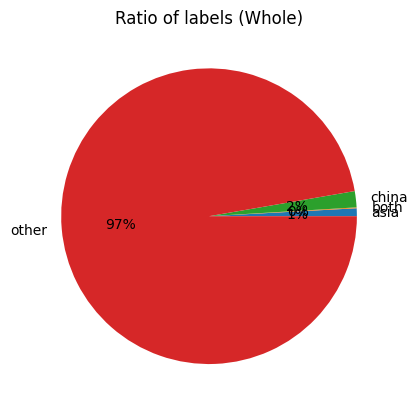

In [ ]:
df.groupby('Target').size().plot(kind = 'pie',
                subplots = False,
                autopct = '%1.0f%%',
                title = 'Ratio of labels (Whole)')

In [ ]:
df.groupby('Target').size()

Target
asia       2508
both        282
china      5177
other    284681
dtype: int64

### 準備 df.y

In [15]:
df = df.drop(df[df['Target'] == 'other'].index)
df = df.drop(df[df['Target'] == 'both'].index)
df.head(3)

,topic,posts,Target
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,china
23,https://www.econjobrumors.com/topic/are-more-t...,"[Not even accounting for Indians., All the qua...",asia
44,https://www.econjobrumors.com/topic/reminder-c...,"[Never forget. Never forgive., .]",china


In [ ]:
df.shape

(7685, 3)

In [17]:
df.groupby('Target').size()

Target
asia     2508
china    5177
dtype: int64

In [16]:
df['y'] = df['Target'].apply(lambda x: 1 if x == 'asia' else 0)
df.head(3)

,topic,posts,Target,y
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,china,0
23,https://www.econjobrumors.com/topic/are-more-t...,"[Not even accounting for Indians., All the qua...",asia,1
44,https://www.econjobrumors.com/topic/reminder-c...,"[Never forget. Never forgive., .]",china,0


### y的視覺化 

<Axes: title={'center': 'Ratio of labels'}, ylabel='Target'>

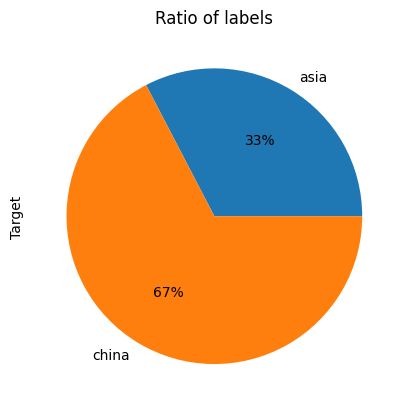

In [ ]:
df.groupby('Target').size().plot(kind = 'pie',
                subplots = False,
                ylabel = 'Target',
                autopct = '%1.0f%%',
                title = 'Ratio of labels')

畫每個(篩過)主題的文章數量barplot

In [ ]:
posts_len = []

for index, row in df.iterrows():
    posts_len.append( len(row['posts']) )

len(posts_len) 

7685

In [ ]:
pd.Series(posts_len).describe()

count    7685.000000
mean       23.176057
std        77.140715
min         0.000000
25%         4.000000
50%         9.000000
75%        24.000000
max      4833.000000
dtype: float64

In [ ]:
posts_len.count(0)

73

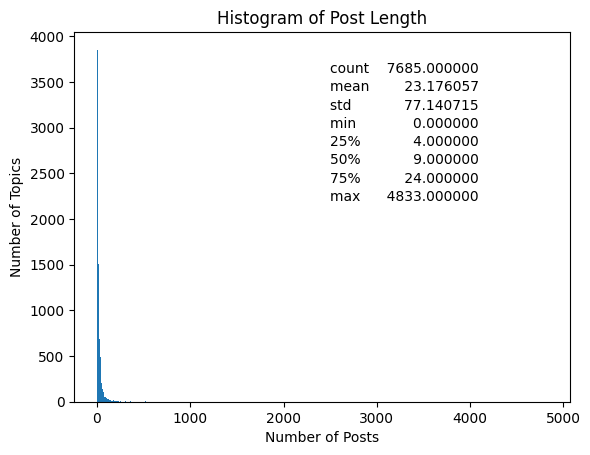

In [ ]:
from nltk.tag import pos_tag_sents
import matplotlib.pyplot as plt
# ram is quite dangerous at this step

plt.hist( posts_len, bins=500 )
plt.xlabel('Number of Posts')
plt.ylabel('Number of Topics')
plt.title('Histogram of Post Length')
plt.text(2500, 3600, 'count    7685.000000')
plt.text(2500, 3400, 'mean        23.176057')
plt.text(2500, 3200, 'std            77.140715')
plt.text(2500, 3000, 'min             0.000000')
plt.text(2500, 2800, '25%            4.000000')
plt.text(2500, 2600, '50%            9.000000')
plt.text(2500, 2400, '75%          24.000000')
plt.text(2500, 2200, 'max      4833.000000')
plt.show()

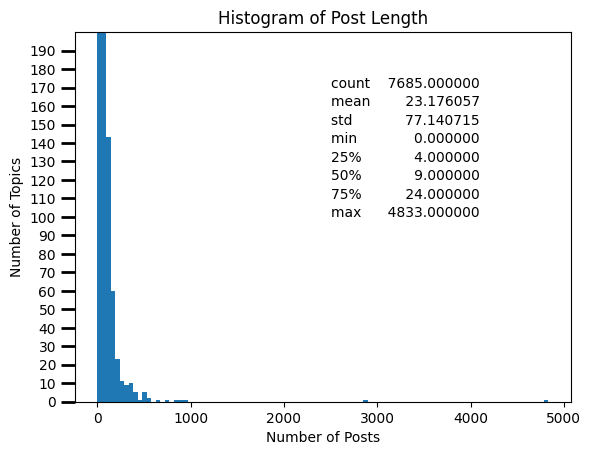

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(posts_len, bins=100)

ax.set_ylim([0, 200]) # set y-axis limits to [0, 500]
ax.set_yticks(range(0, 200, 10)) # set y-ticks at intervals of 10
ax.tick_params(axis='y', which='major', length=10, width=2) # format major y-ticks
ax.tick_params(axis='y', which='minor', length=5, width=1) # format minor y-ticks
plt.xlabel('Number of Posts')
plt.ylabel('Number of Topics')
plt.title('Histogram of Post Length')
plt.text(2500, 170, 'count    7685.000000')
plt.text(2500, 160, 'mean        23.176057')
plt.text(2500, 150, 'std            77.140715')
plt.text(2500, 140, 'min             0.000000')
plt.text(2500, 130, '25%            4.000000')
plt.text(2500, 120, '50%            9.000000')
plt.text(2500, 110, '75%          24.000000')
plt.text(2500, 100, 'max      4833.000000')
plt.show()

## 準備 X (做 NLP 前處理， Stemming/Lemmatization)

In [ ]:
import nltk
nltk.download('punkt') #this is download for tonkenizer
nltk.download('wordnet')  # this is download for lemmatizer
nltk.download('stopwords')
nltk.download('omw-1.4')  # this is download for lemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# 寫 Preprocessor 的 params functions

In [ ]:
import string
import re
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Define a function to preprocess text
def preprocess_text(text):
  # Lowercase all characters
  text = text.lower()

  # Remove non-English sentences
  pattern = re.compile(r'[^\x00-\x7F]+')
  text = re.sub(pattern, '', text)

  # Remove URLs
  text = re.sub(r'https?://\S+', '', text)

  # Remove digits
  text = text.translate(str.maketrans('', '', string.digits))

  # Remove punctuation
  text = text.translate(str.maketrans('', '', string.punctuation))

  return text


# Define a function to tokenize and remove stopwords from text and stemmer
def stemmer_tokenize_and_remove_stopwords(text):
  # Tokenize the article
  text_tokens = word_tokenize(text)

  # Load English stopwords
  stop_words = set(stopwords.words('english'))

  # Remove stopwords
  tokens = [token for token in text_tokens if token not in stop_words]

  # Stem the tokens
  stemmer = PorterStemmer()
  tokens = [stemmer.stem(token) for token in tokens]

  return tokens


# Define a function to tokenize and remove stopwords from text and lemmatize
def lemmatizer_tokenize_and_remove_stopwords(text):
  # Tokenize the article
  text_tokens = word_tokenize(text)

  # Load English stopwords
  stop_words = set(stopwords.words('english'))

  # Remove stopwords
  tokens = [token for token in text_tokens if token not in stop_words]

  # Lemmatize the tokens
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(token) for token in tokens]

  return tokens


In [ ]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Some of posts are non-eng, they didnt be counted in when tokenizing, which make some of tokens are `[]`. so the step of removal is needed.

In [ ]:
## the input type
df['stemmed_tokenized'] = df['posts'].apply(lambda x: stemmer_tokenize_and_remove_stopwords(preprocess_text( ' '.join(x) ))) 
print(df.shape)
df['lemmatized_tokenized'] = df['posts'].apply(lambda x: lemmatizer_tokenize_and_remove_stopwords(preprocess_text( ' '.join(x) ))) 
print(df.shape)

(7685, 5)
(7685, 6)


In [ ]:
print( df[df['lemmatized_tokenized'].str.len() == 0].shape)
print( df[df['stemmed_tokenized'].str.len() == 0].shape)

(189, 6)
(189, 6)


In [ ]:
# delete blank space
df = df[df['lemmatized_tokenized'].str.len() != 0]
print(df.shape)
df[['y', 'stemmed_tokenized', 'lemmatized_tokenized']].head(3)

(7496, 6)


,y,stemmed_tokenized,lemmatized_tokenized
2,0,"[geniu, outcom, west, look, russian, financ, t...","[genius, outcome, west, looking, russian, fina..."
23,1,"[even, account, indian, quant, club, univers, ...","[even, accounting, indian, quant, club, univer..."
44,0,"[never, forget, never, forgiv]","[never, forget, never, forgive]"


存成csv會變得超級麻煩，list會變成str

In [ ]:
# df[['y', 'stemmed_tokenized', 'lemmatized_tokenized']].to_csv("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_CA_tokens.csv")

In [ ]:
#df = pd.read_csv("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_CA_tokens.csv", index_col=0)
#df.shape

(7496, 3)

In [ ]:
#df.head()

,y,stemmed_tokenized,lemmatized_tokenized
2,0,"['geniu', 'outcom', 'west', 'look', 'russian',...","['genius', 'outcome', 'west', 'looking', 'russ..."
23,1,"['even', 'account', 'indian', 'quant', 'club',...","['even', 'accounting', 'indian', 'quant', 'clu..."
44,0,"['never', 'forget', 'never', 'forgiv']","['never', 'forget', 'never', 'forgive']"
69,0,"['olymp', 'olymp', 'news', 'whether', 'would',...","['olympics', 'olympics', 'news', 'whether', 'w..."
110,1,"['laptop', 'leetcod', 'theyr', 'liter', 'grind...","['laptop', 'leetcode', 'theyre', 'literally', ..."


In [ ]:
# type(df.stemmed_tokenized.iloc[0])

str

In [ ]:
df[['y', 'stemmed_tokenized', 'lemmatized_tokenized']].to_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_CA_tokens1.pkl")

In [18]:
df = pd.read_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_CA_tokens1.pkl")
df.shape

(7496, 3)

In [ ]:
df.head()

,y,stemmed_tokenized,lemmatized_tokenized
2,0,"[geniu, outcom, west, look, russian, financ, t...","[genius, outcome, west, looking, russian, fina..."
23,1,"[even, account, indian, quant, club, univers, ...","[even, accounting, indian, quant, club, univer..."
44,0,"[never, forget, never, forgiv]","[never, forget, never, forgive]"
69,0,"[olymp, olymp, news, whether, would, war, russ...","[olympics, olympics, news, whether, would, war..."
110,1,"[laptop, leetcod, theyr, liter, grind, leetcod...","[laptop, leetcode, theyre, literally, grinding..."


In [ ]:
type(df.stemmed_tokenized.iloc[0])

list

In [19]:
df.groupby('y').size()

y
0    5051
1    2445
dtype: int64

## Word2Vec (和 目標字 有關的w2v)

In [ ]:
from gensim.models import Word2Vec

## setting
vector_size = 100
window = 5
min_count = 1
training_epochs = 20

In [ ]:
gensim.__version__

'4.3.1'

In [ ]:
corpus_lemmatized = df['lemmatized_tokenized'].values
corpus_stemmed = df['stemmed_tokenized'].values

In [ ]:
topn = 5

In [ ]:
## model
word2vec_lemmatized = Word2Vec(sentences=corpus_lemmatized, vector_size=vector_size, window=window, min_count=min_count, epochs=training_epochs) 

# Get the most similar words
for word in both_target:
  print(word)
  print(pd.DataFrame(word2vec_lemmatized.wv.most_similar(word, topn=topn), columns=['Word', 'Sims']))
  print('-------')

asian
             Word      Sims
0           white  0.589682
1  asianamericans  0.579603
2        nonwhite  0.566273
3   discriminated  0.531036
4         african  0.508833
-------
asia
        Word      Sims
0  turkistan  0.628863
1    asiahow  0.574669
2  turkestan  0.572571
3    asiaand  0.567103
4  bethlehem  0.560334
-------
korea
           Word      Sims
0  asiansmalays  0.662030
1      ravaging  0.658760
2         xhina  0.654753
3   americaeast  0.654647
4          racm  0.643079
-------
korean
          Word      Sims
0        korea  0.534451
1  korealoving  0.527674
2     wringing  0.524500
3       nhanes  0.496701
4     ravaging  0.467799
-------
japan
          Word      Sims
0     japanese  0.536533
1    latecomer  0.500430
2       usabro  0.487181
3       skorea  0.449256
4  conjectured  0.444989
-------
japanese
     Word      Sims
0   japan  0.536533
1  german  0.536230
2     spc  0.498836
3   anime  0.481676
4   vince  0.478815
-------
taiwan
            Word      Si

In [ ]:
## model
word2vec_stemmed = Word2Vec(sentences=corpus_stemmed, vector_size=vector_size, window=window, min_count=min_count, epochs=training_epochs) 
#, window=window_size, min_count=min_count, epochs=training_epochs)

# Because the corpus are stemmed, so my key  words also need to be stemmed
stemmer = PorterStemmer()

# Get the most similar words
for word in both_target:
  print(word)
  print(pd.DataFrame(word2vec_stemmed.wv.most_similar( stemmer.stem(word), topn=topn), columns=['Word', 'Sims']))
  print('-------')

asian
            Word      Sims
0  asianamerican  0.645273
1        nonwhit  0.616555
2          white  0.610189
3       nonasian  0.545945
4      discrimin  0.539188
-------
asia
        Word      Sims
0  turkestan  0.596108
1       hoie  0.582660
2  turkistan  0.573830
3    asiaand  0.558321
4  southeast  0.546790
-------
korea
                     Word      Sims
0             asiansmalay  0.686343
1  americaeuropeaustralia  0.662201
2                carolina  0.659737
3                gradient  0.654549
4                  xhines  0.651695
-------
korean
      Word      Sims
0    nhane  0.559994
1    korea  0.538787
2  japanes  0.531371
3  postion  0.516426
4  korebro  0.464211
-------
japan
         Word      Sims
0     japanes  0.529639
1  japansouth  0.502420
2       south  0.482824
3     germani  0.469991
4     betabux  0.466231
-------
japanese
     Word      Sims
0  korean  0.531371
1   japan  0.529639
2     jap  0.498238
3  german  0.483976
4     spc  0.464553
-------
taiwan


## 得到經過 CountVectorizer 的 BOW

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# I've have the tokens, so i pass dummy function in cv.
def dummy(doc):
    return doc

# Create a matrix using CountVectorizer
vectorizer = CountVectorizer(preprocessor = dummy, 
            tokenizer = dummy, 
            strip_accents = 'ascii',
            max_features = 10000)

## 將 目標字 移出 BOW

In [30]:
# Defining all the conditions inside a function
def remove_target(x):
  return [word for word in x if word not in (asia_target + china_target)]

# Applying the conditions
df['lemmatized_cleaned'] = df['lemmatized_tokenized'].apply(remove_target)
df['stemmed_cleaned'] = df['stemmed_tokenized'].apply(remove_target)
df.head(3)

,y,stemmed_tokenized,lemmatized_tokenized,lemmatized_cleaned,stemmed_cleaned
2,0,"[geniu, outcom, west, look, russian, financ, t...","[genius, outcome, west, looking, russian, fina...","[genius, outcome, west, looking, russian, fina...","[geniu, outcom, west, look, russian, financ, t..."
23,1,"[even, account, indian, quant, club, univers, ...","[even, accounting, indian, quant, club, univer...","[even, accounting, indian, quant, club, univer...","[even, account, indian, quant, club, univers, ..."
44,0,"[never, forget, never, forgiv]","[never, forget, never, forgive]","[never, forget, never, forgive]","[never, forget, never, forgiv]"


## 得到 lemmatized 或 stemmed 的 X

In [24]:
import scipy.sparse

In [31]:
lemmatized_matrix = vectorizer.fit_transform(df['lemmatized_cleaned'])

# Print the matrix
print(lemmatized_matrix.toarray())

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [32]:
print(lemmatized_matrix.toarray().shape)

(7496, 10000)


In [47]:
'y' in vectorizer.get_feature_names_out()

False

In [ ]:
scipy.sparse.save_npz('/content/gdrive/MyDrive/Thesis_Data&Result/lemmatized_matrix_CA1.npz', lemmatized_matrix)

In [25]:
lemmatized_matrix = scipy.sparse.load_npz('/content/gdrive/MyDrive/Thesis_Data&Result/lemmatized_matrix_CA1.npz')
type(lemmatized_matrix)

scipy.sparse._csr.csr_matrix

In [55]:
stemmed_matrix = vectorizer.fit_transform(df['stemmed_cleaned'])

# Print the matrix
print(stemmed_matrix.toarray())

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(stemmed_matrix.toarray().shape)

(7496, 10000)


In [56]:
scipy.sparse.save_npz('/content/gdrive/MyDrive/Thesis_Data&Result/stemmed_matrix_CA1.npz', stemmed_matrix)

In [57]:
stemmed_matrix = scipy.sparse.load_npz('/content/gdrive/MyDrive/Thesis_Data&Result/stemmed_matrix_CA1.npz')
type(stemmed_matrix)

scipy.sparse._csr.csr_matrix

df.Target.shape = <del>6657</del> 7496

### concat y and X into dataframe

### lemma

In [46]:
data_lemma = pd.DataFrame(lemmatized_matrix.toarray(), columns = vectorizer.get_feature_names_out())
data_lemma['y'] = list(df.y)
#data_lemma = data_lemma.fillna(0)
print(data_lemma.shape)
data_lemma.head(3)

(7496, 10001)


,aa,ab,abandon,abandoned,abandoning,abc,abe,abel,abiding,ability,...,zju,zombie,zone,zoo,zoom,zoomers,zou,zu,zuel,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
list(df.y)

In [48]:
data_lemma.y

0       0
1       1
2       0
3       0
4       1
       ..
7491    0
7492    0
7493    0
7494    0
7495    0
Name: y, Length: 7496, dtype: int64

In [50]:
data_lemma.y.isnull().sum()

0

In [52]:
data_lemma.y.sum()

2445

In [51]:
data_lemma.to_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_lemma_CA1.pkl")

---

In [53]:
data_lemma = pd.read_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_lemma_CA1.pkl")
print(data_lemma.shape)
data_lemma.head()

(7496, 10001)


,aa,ab,abandon,abandoned,abandoning,abc,abe,abel,abiding,ability,...,zju,zombie,zone,zoo,zoom,zoomers,zou,zu,zuel,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [54]:
data_lemma.groupby('y').size()

y
0    5051
1    2445
dtype: int64

### stem

In [58]:
data_stem = pd.DataFrame(stemmed_matrix.toarray(), columns = vectorizer.get_feature_names_out())
data_stem['y'] = list(df.y)
# data_stem = data_stem.fillna(0)
print(print(data_stem.shape))
data_stem.head(3)

(7496, 10001)
None


,aa,aapi,ab,abandon,abc,abduct,abe,abel,abenom,abid,...,zoo,zoom,zoomer,zou,zscaler,zu,zuckerberg,zuel,zurich,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
data_stem.to_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_stem_CA1.pkl")

In [60]:
data_stem.groupby('y').size()

y
0    5051
1    2445
dtype: int64

---

In [61]:
data_stem = pd.read_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_stem_CA1.pkl")
print(data_stem.shape)
data_stem.head()

(7496, 10001)


,aa,aapi,ab,abandon,abc,abduct,abe,abel,abenom,abid,...,zoo,zoom,zoomer,zou,zscaler,zu,zuckerberg,zuel,zurich,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# 真正要跑的部分

說點什麼

### Training set and Testing set 

In [62]:
from sklearn.model_selection import train_test_split

#### lemma

In [63]:
data_lemma = pd.read_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_lemma_CA1.pkl")
print(data_lemma.shape)
data_lemma.head()

(7496, 10001)


,aa,ab,abandon,abandoned,abandoning,abc,abe,abel,abiding,ability,...,zju,zombie,zone,zoo,zoom,zoomers,zou,zu,zuel,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [65]:
train_lemma, test_lemma = train_test_split(data_lemma, test_size=0.5,  random_state = 9413)

In [66]:
print('Shape of training set: ', train_lemma.shape)
print('Shape of testing set: ', test_lemma.shape)

Shape of training set:  (3748, 10001)
Shape of testing set:  (3748, 10001)


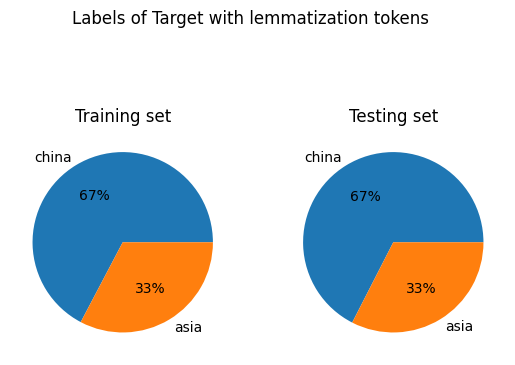

In [67]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)
ax[0].pie(train_lemma.groupby(['y']).size(),
        labels = ['china', 'asia'],
         autopct = '%1.0f%%',
         )
ax[0].set_title('Training set')

ax[1].pie(test_lemma.groupby(['y']).size(),
        labels = ['china', 'asia'],
         autopct = '%1.0f%%',
         )
ax[1].set_title('Testing set')

fig.suptitle('Labels of Target with lemmatization tokens')
plt.show()

#### stem

In [ ]:
data_stem = pd.read_pickle("/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_data_stem_CA1.pkl")
print(data_stem.shape)
data_stem.head()

(18826, 10001)


,y,aa,ab,abandon,abc,abduct,abe,abel,abenom,abid,...,zoom,zoomer,zou,zscaler,zu,zuckerberg,zuel,zulu,zuma,zurich
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_stem, test_stem = train_test_split(data_stem, test_size=0.5,  random_state = 1624)

In [ ]:
print('Shape of training set: ', train_stem.shape)
print('Shape of testing set: ', test_stem.shape)

Shape of training set:  (9413, 10001)
Shape of testing set:  (9413, 10001)


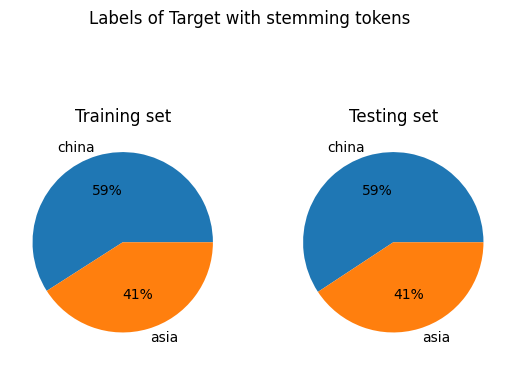

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)
ax[0].pie(train_stem.groupby(['y']).size(),
        labels = ['china', 'asia'],
         autopct = '%1.0f%%',
         )
ax[0].set_title('Training set')

ax[1].pie(test_stem.groupby(['y']).size(),
        labels = ['china', 'asia'],
         autopct = '%1.0f%%',
         )
ax[1].set_title('Testing set')

fig.suptitle('Labels of Target with stemming tokens')
plt.show()

### check COLLINEARITY

In [ ]:
train_lemma.corr()

,y,aa,ab,abandon,abc,abduct,abe,abel,abenom,abid,...,zoom,zoomer,zou,zscaler,zu,zuckerberg,zuel,zulu,zuma,zurich
y,1.000000,-0.038869,-0.023054,-0.020195,-0.033384,-0.013296,-0.035031,-0.026090,-0.013382,-0.019595,...,-0.011430,-0.014564,-0.029945,-0.022835,-0.032225,-0.010585,-0.008541,-0.018955,-0.017085,-0.008541
aa,-0.038869,1.000000,0.021326,0.011039,0.005120,-0.000753,0.005099,-0.001477,-0.000758,0.033679,...,0.002624,-0.000824,0.001186,-0.001293,0.005091,-0.000599,-0.000484,0.001130,-0.000967,-0.000484
ab,-0.023054,0.021326,1.000000,-0.000678,0.017788,-0.000446,0.186029,-0.000876,-0.000449,0.014981,...,0.265928,-0.000489,0.098716,-0.000767,-0.001082,-0.000355,-0.000287,-0.000636,-0.000574,-0.000287
abandon,-0.020195,0.011039,-0.000678,1.000000,0.031250,0.366137,0.067350,-0.000767,-0.000394,-0.000576,...,-0.000336,-0.000428,-0.000881,-0.000672,-0.000948,-0.000311,-0.000251,-0.000558,-0.000503,-0.000251
abc,-0.033384,0.005120,0.017788,0.031250,1.000000,-0.000646,-0.001703,-0.001269,-0.000651,-0.000953,...,-0.000556,-0.000708,0.006166,-0.001110,-0.001567,-0.000515,-0.000415,-0.000922,-0.000831,-0.000415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuckerberg,-0.010585,-0.000599,-0.000355,-0.000311,-0.000515,-0.000205,-0.000540,-0.000402,-0.000206,-0.000302,...,-0.000176,-0.000225,-0.000462,-0.000352,-0.000497,1.000000,-0.000132,-0.000292,-0.000263,-0.000132
zuel,-0.008541,-0.000484,-0.000287,-0.000251,-0.000415,-0.000165,-0.000436,-0.000325,-0.000166,-0.000244,...,-0.000142,-0.000181,-0.000373,-0.000284,-0.000401,-0.000132,1.000000,-0.000236,-0.000213,-0.000106
zulu,-0.018955,0.001130,-0.000636,-0.000558,-0.000922,-0.000367,-0.000967,0.024205,-0.000369,-0.000541,...,-0.000316,-0.000402,-0.000827,-0.000630,-0.000890,-0.000292,-0.000236,1.000000,0.103584,-0.000236
zuma,-0.017085,-0.000967,-0.000574,-0.000503,-0.000831,-0.000331,-0.000872,-0.000649,-0.000333,-0.000488,...,-0.000284,-0.000362,-0.000745,-0.000568,-0.000802,-0.000263,-0.000213,0.103584,1.000000,-0.000213


In [ ]:
train_stem.corr()

,y,aa,ab,abandon,abc,abduct,abe,abel,abenom,abid,...,zoom,zoomer,zou,zscaler,zu,zuckerberg,zuel,zulu,zuma,zurich
y,1.000000,-0.039530,-0.025386,-0.029789,-0.030302,-0.018266,-0.028429,-0.012979,-0.008609,-0.023201,...,-0.034715,-0.017221,-0.012176,NaN,-0.011876,-0.013806,-0.011144,-0.017576,-0.016500,-0.010824
aa,-0.039530,1.000000,-0.000761,0.005600,0.004753,0.004653,-0.001611,-0.000736,-0.000488,0.018914,...,0.005167,-0.000976,-0.000690,NaN,-0.000673,-0.000782,-0.000632,0.031842,0.036272,-0.000613
ab,-0.025386,-0.000761,1.000000,0.005858,0.236153,-0.000665,-0.001035,-0.000472,-0.000313,-0.000844,...,-0.001263,-0.000627,-0.000443,NaN,-0.000432,-0.000502,-0.000406,-0.000640,-0.000600,-0.000394
abandon,-0.029789,0.005600,0.005858,1.000000,-0.001294,0.057493,0.049803,-0.000554,-0.000368,0.013813,...,-0.001482,-0.000735,-0.000520,NaN,-0.000507,-0.000590,-0.000476,-0.000751,-0.000705,-0.000462
abc,-0.030302,0.004753,0.236153,-0.001294,1.000000,-0.000793,-0.001235,-0.000564,-0.000374,0.071272,...,0.006603,-0.000748,-0.000529,NaN,-0.000516,-0.000600,-0.000484,-0.000763,-0.000717,-0.000470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuckerberg,-0.013806,-0.000782,-0.000502,-0.000590,-0.000600,-0.000362,-0.000563,-0.000257,-0.000170,-0.000459,...,-0.000687,-0.000341,-0.000241,NaN,-0.000235,1.000000,-0.000221,-0.000348,-0.000327,-0.000214
zuel,-0.011144,-0.000632,-0.000406,-0.000476,-0.000484,-0.000292,-0.000454,-0.000207,-0.000138,-0.000371,...,-0.000555,-0.000275,-0.000195,NaN,-0.000190,-0.000221,1.000000,-0.000281,-0.000264,-0.000173
zulu,-0.017576,0.031842,-0.000640,-0.000751,-0.000763,-0.000460,0.027378,-0.000327,-0.000217,0.072784,...,-0.000875,-0.000434,-0.000307,NaN,-0.000299,-0.000348,-0.000281,1.000000,0.863234,-0.000273
zuma,-0.016500,0.036272,-0.000600,-0.000705,-0.000717,-0.000432,-0.000672,-0.000307,-0.000204,-0.000549,...,-0.000821,-0.000407,-0.000288,NaN,-0.000281,-0.000327,-0.000264,0.863234,1.000000,-0.000256


## 先跑一次 Lasso，將非零的字詞當作 DoubleML 中的 Treatment

### lemma

In [68]:
from sklearn.linear_model import LassoCV

clf = LassoCV(tol=0.01)
clf.fit(train_lemma.loc[:, train_lemma.columns != 'y'], train_lemma['y'])
print(clf.coef_[:10])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.690e+00, tolerance: 6.638e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.751e+01, tolerance: 6.638e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.763e+01, tolerance: 6.638e

[ 0. -0. -0.  0. -0. -0.  0. -0.  0. -0.]


In [69]:
lemmatized_lasso_coef = clf.coef_

print(len(clf.coef_[clf.coef_!=0]))

30


In [70]:
lemmatized_D = data_lemma.keys()[1:][clf.coef_!=0] # remove y
print(lemmatized_D)

Index(['americanized', 'ccps', 'crimea', 'eastern', 'englishspeaking',
       'getting', 'grouping', 'immigrate', 'indiabro', 'interviewed', 'kimchi',
       'knowing', 'nu', 'offered', 'paperwork', 'placed', 'referenced',
       'socioeconomic', 'southeast', 'studied', 'told', 'topic', 'traded',
       'uae', 'univs', 'whiteasian', 'womb', 'worldclass', 'wouldnt', 'xia'],
      dtype='object')


In [71]:
pd.Series(lemmatized_D).to_csv(r'/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_CA_lemmatized_D_9.csv', index=False, header=False)

In [72]:
lemmatized_D = pd.read_csv('/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_CA_lemmatized_D_9.csv', header=None)
print(lemmatized_D)

                  0
0      americanized
1              ccps
2            crimea
3           eastern
4   englishspeaking
5           getting
6          grouping
7         immigrate
8          indiabro
9       interviewed
10           kimchi
11          knowing
12               nu
13          offered
14        paperwork
15           placed
16       referenced
17    socioeconomic
18        southeast
19          studied
20             told
21            topic
22           traded
23              uae
24            univs
25       whiteasian
26             womb
27       worldclass
28          wouldnt
29              xia


### stem

In [ ]:
from sklearn.linear_model import LassoCV

clf = LassoCV(tol=0.01)
clf.fit(train_stem.loc[:, train_stem.columns != 'y'], train_stem['y'])
print(clf.coef_[:10])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.368e+01, tolerance: 1.821e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.687e+01, tolerance: 1.821e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.105e+01, tolerance: 1.821e

[ 0. -0. -0. -0.  0. -0. -0. -0. -0.  0.]


In [ ]:
stemmed_lasso_coef = clf.coef_

print(len(clf.coef_[clf.coef_!=0]))

27


In [ ]:
stemmed_D = data_stem.keys()[1:][clf.coef_!=0]

print(stemmed_D)

Index(['adb', 'african', 'american', 'black', 'chines', 'countri', 'cultur',
       'doctor', 'get', 'good', 'interview', 'like', 'lol', 'look', 'mao',
       'need', 'op', 'russia', 'south', 'student', 'test', 'us', 'use', 'viru',
       'world', 'would', 'year'],
      dtype='object')


In [ ]:
pd.Series(stemmed_D).to_csv(r'/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_CA_stemmed_D_8.csv', index=False, header=False)

In [ ]:
stemmed_D = pd.read_csv('/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_CA_stemmed_D_8.csv', header=None)
print(stemmed_D)

            0
0         adb
1     african
2    american
3       black
4      chines
5     countri
6      cultur
7      doctor
8         get
9        good
10  interview
11       like
12        lol
13       look
14        mao
15       need
16         op
17     russia
18      south
19    student
20       test
21         us
22        use
23       viru
24      world
25      would
26       year


In [ ]:
'countri' in set(test_stem.keys())

True

In [ ]:
print(list(stemmed_D[0]))

['account', 'adb', 'africa', 'african', 'age', 'america', 'american', 'appear', 'argument', 'ask', 'b', 'back', 'ban', 'bat', 'best', 'black', 'blk', 'bro', 'call', 'camera', 'canada', 'cancel', 'card', 'care', 'ccp', 'children', 'chinabro', 'chines', 'claim', 'colleagu', 'coloni', 'come', 'compani', 'could', 'countri', 'covid', 'cultur', 'date', 'day', 'death', 'depart', 'die', 'differ', 'discrimin', 'doctor', 'eat', 'ejmr', 'english', 'etc', 'eu', 'europ', 'even', 'evid', 'fact', 'fake', 'feel', 'first', 'food', 'genocid', 'get', 'give', 'given', 'global', 'go', 'good', 'govern', 'great', 'he', 'hk', 'idea', 'immigr', 'increas', 'india', 'intellig', 'interview', 'japanes', 'job', 'kid', 'know', 'last', 'law', 'left', 'like', 'live', 'lol', 'look', 'lot', 'man', 'mao', 'market', 'mask', 'mean', 'minor', 'money', 'much', 'must', 'n', 'na', 'nation', 'need', 'new', 'north', 'offici', 'one', 'op', 'page', 'paper', 'pay', 'peopl', 'pleas', 'point', 'polic', 'polici', 'post', 'power', 'pro

## 跑 DoubleML (根據上面得到的 Treatment 和 Control)

In [ ]:
!pip install -U DoubleML

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.3/211.3 kB 4.3 MB/s eta 0:00:00


In [ ]:
import doubleml as dml
from sklearn.base import clone
from sklearn.linear_model import Lasso 

learner = Lasso(alpha=0.1)

ml_l = clone(learner)

ml_m = clone(learner)

In [ ]:
import doubleml as dml
from sklearn.base import clone
from sklearn.linear_model import LogisticRegression ### note here

learner = LogisticRegression(penalty='l1')

ml_l = clone(learner)

ml_m = clone(learner)

### 使符合套件要求的資料格式

In [ ]:
len(vectorizer.get_feature_names_out())

10000

### lemmatized

In [ ]:
obj_dml_data_lemma = dml.DoubleMLData(test_lemma,
                y_col = 'y',
                d_cols = list(lemmatized_D[0])
                )

dml_plr_obj_lemma = dml.DoubleMLPLR(obj_dml_data_lemma, ml_l, ml_m)

dml_plr_obj_lemma.fit();

print(dml_plr_obj_lemma)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.574e+01, tolerance: 2.057e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.098e+01, tolerance: 2.057e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.599e+01, tolerance: 2.050e

================== DoubleMLPLR Object ==================

------------------ Data summary      ------------------
Outcome variable: y
Treatment variable(s): ['alan', 'animos', 'boarder', 'currenc', 'cx', 'deng', 'etiquett', 'gao', 'ha', 'halt', 'hardwar', 'hasnt', 'hopelessli', 'legit', 'madrid', 'mari', 'midwit', 'nonwhit', 'nse', 'overr', 'overt', 'selfhat', 'show', 'squash', 'statist', 'toilet', 'wasp', 'worst', 'wrongpoorli', 'wwi', 'yahoo', 'ying']
Covariates: ['aa', 'ab', 'abandon', 'abc', 'abduct', 'abe', 'abel', 'abenom', 'abid', 'abil', 'abl', 'abnorm', 'abolish', 'aborigin', 'abort', 'abraham', 'abroad', 'absenc', 'absent', 'absolut', 'absolv', 'absorb', 'abstract', 'absurd', 'abt', 'abund', 'abus', 'abysm', 'ac', 'aca', 'academ', 'academi', 'academia', 'acceler', 'accent', 'accept', 'access', 'accid', 'accident', 'accommod', 'accomod', 'accompani', 'accomplish', 'accord', 'accordingli', 'account', 'accredit', 'accumul', 'accur', 'accuraci', 'accus', 'ace', 'acemoglu', 'achie

### Stem

,y,aa,ab,abandon,abandoned,abandoning,abc,abe,abel,abide,...,zip,ziqi,zju,zombie,zone,zoo,zoom,zoomers,zu,zuel
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


DoubleMLClusterData.from_arrays(x, y, d, cluster_vars, z)

In [ ]:
obj_dml_data_stem = dml.DoubleMLData(test_stem,
                y_col = 'y',
                d_cols = list(stemmed_D[0])
                )

dml_plr_obj_stem = dml.DoubleMLPLR(obj_dml_data_stem, ml_l, ml_m)

dml_plr_obj_stem.fit();

print(dml_plr_obj_stem)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.906e+02, tolerance: 1.920e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.635e+02, tolerance: 3.381e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.664e+01, tolerance: 3.034e

================== DoubleMLPLR Object ==================

------------------ Data summary      ------------------
Outcome variable: y
Treatment variable(s): ['adb', 'african', 'american', 'black', 'chines', 'countri', 'cultur', 'doctor', 'get', 'good', 'interview', 'like', 'lol', 'look', 'mao', 'need', 'op', 'russia', 'south', 'student', 'test', 'us', 'use', 'viru', 'world', 'would', 'year']
Covariates: ['aa', 'ab', 'abandon', 'abc', 'abduct', 'abe', 'abel', 'abenom', 'abid', 'abil', 'abl', 'abnorm', 'abolish', 'aborigin', 'abort', 'abraham', 'abroad', 'absenc', 'absent', 'absolut', 'absolv', 'absorb', 'abstract', 'absurd', 'abt', 'abund', 'abus', 'abysm', 'ac', 'aca', 'academ', 'academi', 'academia', 'acceler', 'accent', 'accept', 'access', 'accid', 'accident', 'accommod', 'accomod', 'accompani', 'accomplish', 'accord', 'accordingli', 'account', 'accredit', 'accumul', 'accur', 'accuraci', 'accus', 'ace', 'acemoglu', 'achiev', 'acid', 'acknowledg', 'acquaint', 'acquir', 'acquisit', 'ac

`ValueError: Invalid treatment variable(s) d_cols. At least one treatment variable is no data column.`


### APE 和 CI

但其實APE好像不行捏

In [ ]:
print(dml_plr_obj_lemma.coef)

[ 0.01460205 -0.01719399 -0.01054653 -0.00172618  0.01716324 -0.01865324
 -0.03705409 -0.08648997  0.02979277 -0.00883415  0.00107986 -0.07679168
  0.0094335  -0.01098619  0.00349446 -0.01192886 -0.02891632 -0.00613581
 -0.00585586  0.03189455  0.00071051 -0.00101825 -0.00805528 -0.02176637
 -0.03145907 -0.00200518  0.00967346  0.00286695 -0.02077982  0.01969622
  0.00520584 -0.06388647 -0.02398189  0.0063012  -0.03951985 -0.01246038
  0.02443134 -0.00488906 -0.04984643  0.02067968  0.02487781 -0.02489857
  0.00950422 -0.05051983 -0.00143834 -0.02606197 -0.0382987  -0.00848585
  0.0136201  -0.02273323  0.01705858  0.03242493 -0.04564416]


In [ ]:
print(dml_plr_obj_stem.coef)

[ 0.01176692 -0.00804591 -0.0079196  -0.00789764 -0.00817338 -0.0171857
  0.00571477 -0.01229733  0.01583464 -0.00020018  0.00661168 -0.01619057
 -0.01845452 -0.03010413 -0.09411334 -0.00277537 -0.03913869 -0.00296403
 -0.01237509 -0.01866712 -0.002631    0.00083819 -0.0116035  -0.00692882
 -0.00470196  0.00829702  0.01314517]


### 看看 stemming 和 lemmatization 的 CI ，用誰?

In [ ]:
dml_plr_obj_lemma.summary

,coef,std err,t,P>|t|,2.5 %,97.5 %
adversari,0.014602,0.000075,194.776523,0.000000e+00,0.014455,0.014749
alan,-0.017194,0.002955,-5.819244,5.911446e-09,-0.022985,-0.011403
animos,-0.010547,0.007036,-1.498853,1.339119e-01,-0.024338,0.003245
boarder,-0.001726,0.004151,-0.415813,6.775467e-01,-0.009863,0.006410
cctv,0.017163,0.016700,1.027769,3.040584e-01,-0.015567,0.049894
currenc,-0.018653,0.009123,-2.044634,4.089100e-02,-0.036534,-0.000772
cx,-0.037054,0.009269,-3.997610,6.398518e-05,-0.055221,-0.018887
demon,-0.086490,0.012962,-6.672509,2.514667e-11,-0.111895,-0.061085
deng,0.029793,0.011064,2.692830,7.084847e-03,0.008108,0.051477
drawn,-0.008834,0.009274,-0.952546,3.408200e-01,-0.027011,0.009343


In [ ]:
dml_plr_obj_stem.summary

,coef,std err,t,P>|t|,2.5 %,97.5 %
adb,0.011767,0.000079,148.095293,0.000000e+00,0.011611,0.011923
african,-0.008046,0.005728,-1.404739,1.600990e-01,-0.019272,0.003180
american,-0.007920,0.006129,-1.292124,1.963143e-01,-0.019932,0.004093
black,-0.007898,0.003149,-2.508287,1.213182e-02,-0.014069,-0.001726
chines,-0.008173,0.005286,-1.546088,1.220832e-01,-0.018535,0.002188
countri,-0.017186,0.009731,-1.766013,7.739369e-02,-0.036259,0.001887
cultur,0.005715,0.007686,0.743511,4.571724e-01,-0.009350,0.020779
doctor,-0.012297,0.005410,-2.273035,2.302407e-02,-0.022901,-0.001694
get,0.015835,0.007044,2.247928,2.458080e-02,0.002028,0.029641
good,-0.000200,0.008061,-0.024833,9.801883e-01,-0.015999,0.015599


# Result

In [ ]:
dml_plr_obj_lemma.summary.to_csv('/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_CA_lasso_dml_plr_lemma_6.csv')  

In [ ]:
dml_plr_obj_stem.summary.to_csv('/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_CA_lasso_dml_plr_stem_8.csv')  

## 讀檔

In [ ]:
lemmatized_result = pd.read_csv('/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_CA_lasso_dml_plr_lemma_6.csv') 

In [ ]:
stemmed_result = pd.read_csv('/content/gdrive/MyDrive/Thesis_Data&Result/EJMR_CA_lasso_dml_plr_stem_8.csv')  

In [ ]:
lemmatized_result.sort_values(by=['coef']).head(30)

,Unnamed: 0,coef,std err,t,P>|t|,2.5 %,97.5 %
20,overt,-0.072327,0.017565,-4.117728,0.000038,-0.106753,-0.037900
22,show,-0.056468,0.063526,-0.888892,0.374061,-0.180976,0.068041
16,midwit,-0.040209,0.020790,-1.934024,0.053110,-0.080957,0.000539
8,ha,-0.031001,0.015628,-1.983659,0.047294,-0.061631,-0.000370
4,cx,-0.026028,0.007649,-3.402892,0.000667,-0.041019,-0.011037
18,nse,-0.024964,0.010894,-2.291504,0.021934,-0.046316,-0.003612
10,hardwar,-0.021621,0.018491,-1.169285,0.242289,-0.057863,0.014621
15,mari,-0.020360,0.016170,-1.259134,0.207982,-0.052052,0.011332
30,yahoo,-0.019628,0.015401,-1.274413,0.202517,-0.049813,0.010558
24,statist,-0.018929,0.008342,-2.269005,0.023268,-0.035279,-0.002578


In [ ]:
lemmatized_result.sort_values(by=['coef']).tail(30)

NameError: ignored

In [ ]:
stemmed_result.sort_values(by=['coef']).head(30)

,Unnamed: 0,coef,std err,t,P>|t|,2.5 %,97.5 %
14,mao,-0.094113,0.019439,-4.841548,1.288314e-06,-0.132212,-0.056014
16,op,-0.039139,0.017537,-2.231772,2.563000e-02,-0.073511,-0.004767
13,look,-0.030104,0.018086,-1.664530,9.600650e-02,-0.065551,0.005343
19,student,-0.018667,0.009678,-1.928832,5.375168e-02,-0.037636,0.000301
12,lol,-0.018455,0.010996,-1.678300,9.328846e-02,-0.040006,0.003097
5,countri,-0.017186,0.009731,-1.766013,7.739369e-02,-0.036259,0.001887
11,like,-0.016191,0.004816,-3.362104,7.735087e-04,-0.025629,-0.006752
18,south,-0.012375,0.003164,-3.911166,9.185166e-05,-0.018576,-0.006174
7,doctor,-0.012297,0.005410,-2.273035,2.302407e-02,-0.022901,-0.001694
22,use,-0.011603,0.007813,-1.485088,1.375205e-01,-0.026917,0.003710


In [ ]:
stemmed_result.sort_values(by=['coef']).tail(30)

,Unnamed: 0,coef,std err,t,P>|t|,2.5 %,97.5 %
77,swufe,-0.001971,0.001800,-1.094933,2.735461e-01,-0.005500,0.001557
9,bcg,-0.001842,0.004192,-0.439443,6.603405e-01,-0.010059,0.006375
91,wo,-0.001312,0.003276,-0.400602,6.887128e-01,-0.007734,0.005109
23,emerged,-0.001121,0.003212,-0.348953,7.271245e-01,-0.007415,0.005174
67,scorer,-0.001119,0.006814,-0.164201,8.695727e-01,-0.014474,0.012236
75,suing,-0.001014,0.009438,-0.107433,9.144452e-01,-0.019512,0.017484
60,pocket,-0.000984,0.006442,-0.152722,8.786179e-01,-0.013611,0.011643
73,success,-0.000908,0.002840,-0.319894,7.490487e-01,-0.006475,0.004658
11,catching,-0.000298,0.001607,-0.185530,8.528137e-01,-0.003448,0.002852
86,videocon,-0.000200,0.000112,-1.792573,7.304129e-02,-0.000419,0.000019
